In [47]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import os
import numpy as np

In [325]:
data_folder = "../data"
test_file = os.path.join(data_folder, "test.csv")
train_file = os.path.join(data_folder, "train.csv")

In [326]:
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [11]:
train_data.head()

,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0
2,0.0003,-2.4074,0
3,0.0004,-3.1404,0
4,0.0005,-3.1525,0


In [12]:
train_data.shape

(5000000, 3)

In [35]:
def show_data(data=train_data, min_index=0, max_index=-1, lw=0.1):
    if max_index < 0:
        max_index = data.shape[0]
    min_index = int(min_index)
    max_index = int(max_index)
    fig, ax = plt.subplots(2, 1, sharex = True, figsize=(15, 8))
    ax[0].plot(train_data["time"].iloc[min_index:max_index], train_data["signal"].iloc[min_index:max_index], linewidth=lw)
    ax[1].plot(train_data["time"].iloc[min_index:max_index], train_data["open_channels"].iloc[min_index:max_index], linewidth=lw)

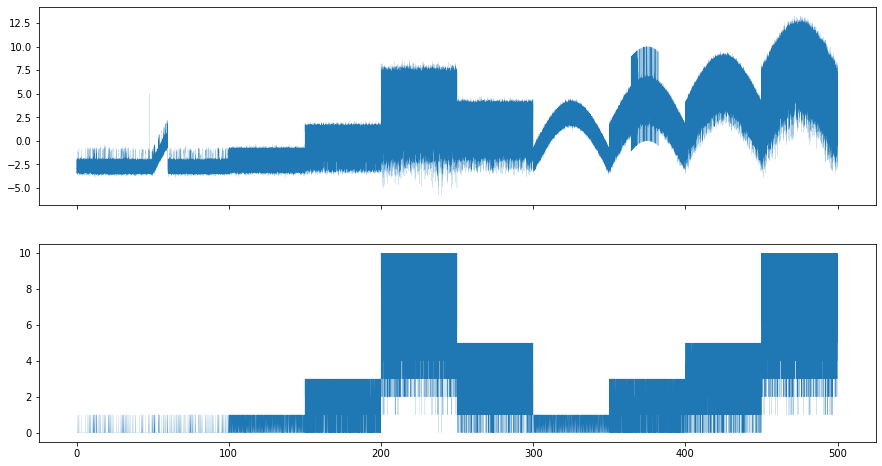

In [36]:
show_data()

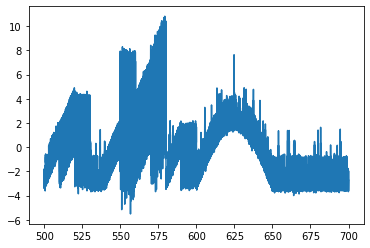

In [120]:
plt.plot(test_data["time"], test_data["signal"])
plt.show()

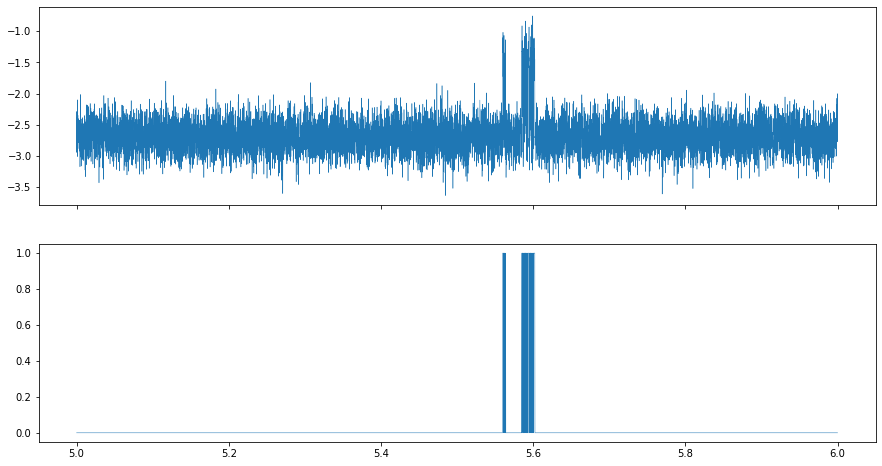

In [37]:
show_data(min_index=5*10000, max_index=6*10000, lw=0.5)

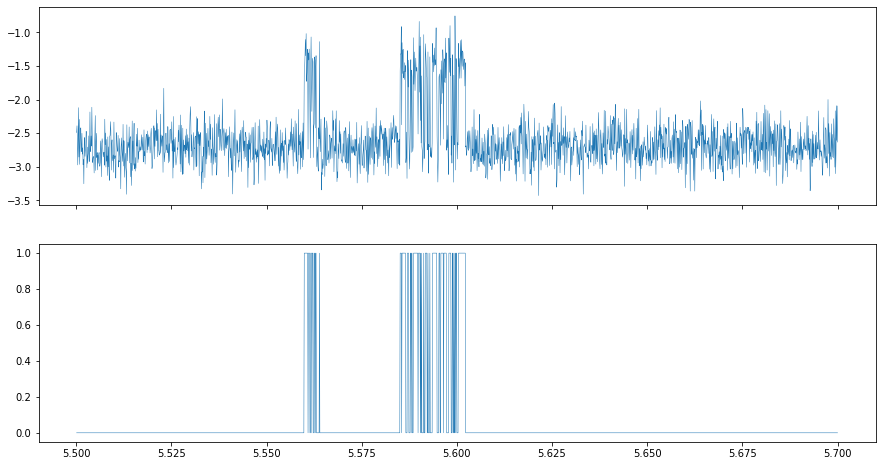

In [38]:
show_data(min_index=5.5*10000, max_index=5.7*10000, lw=0.5)

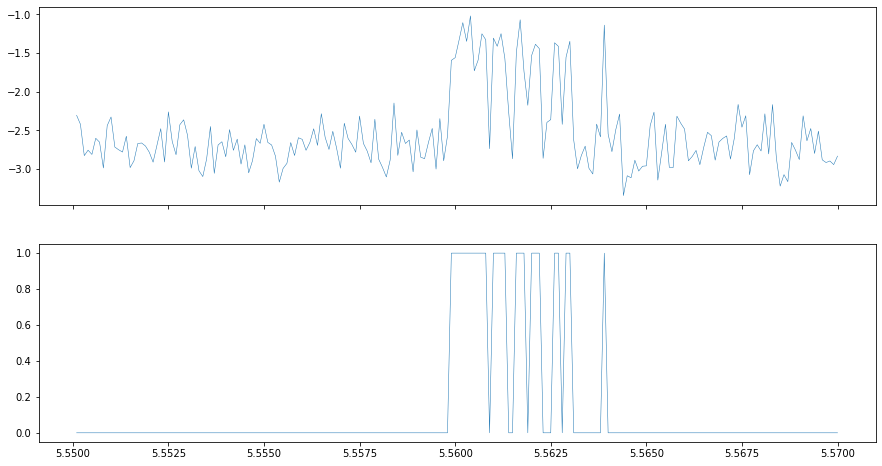

In [40]:
show_data(min_index=5.550*10000, max_index=5.570*10000, lw=0.5)

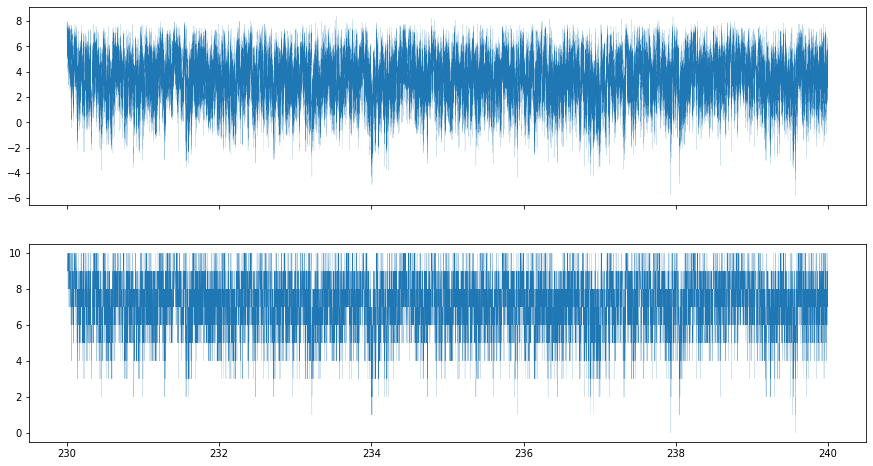

In [42]:
show_data(min_index=230*10000, max_index=240*10000, lw=0.1)

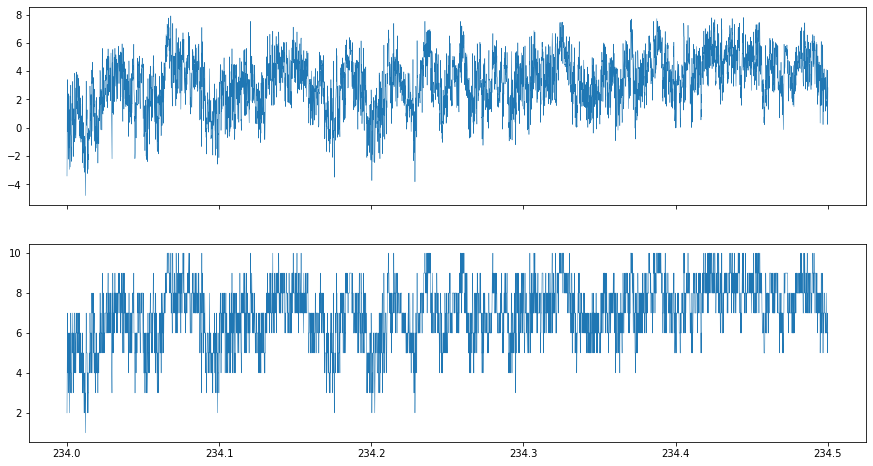

In [44]:
show_data(min_index=234*10000, max_index=234.5*10000, lw=0.5)

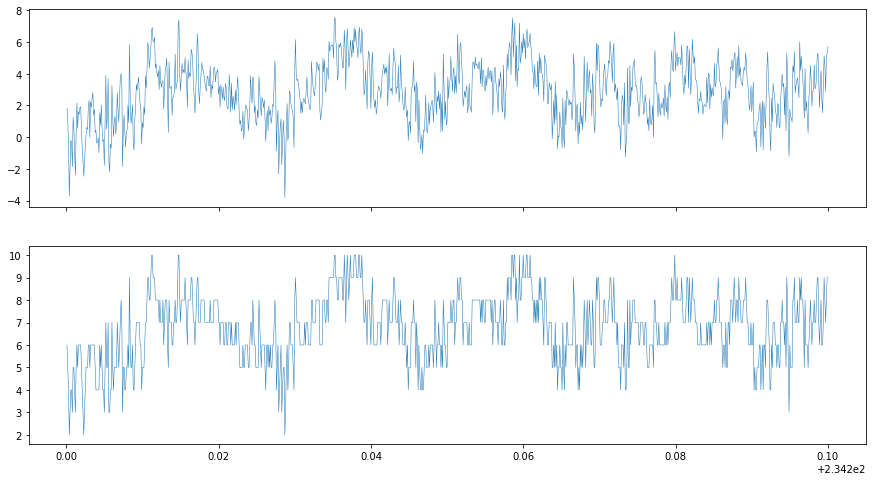

In [46]:
show_data(min_index=234.2*10000, max_index=234.3*10000, lw=0.5)

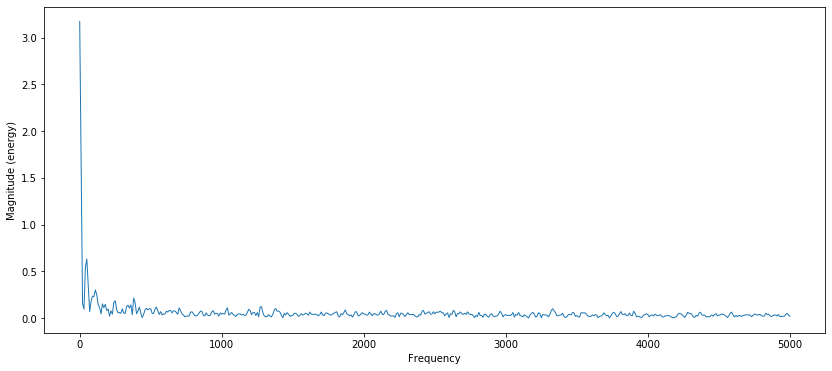

In [87]:
min_x = int(234.2*10000)
max_x = int(234.3*10000)
lw = 1
plt.figure(figsize=(14, 6))
plt.magnitude_spectrum(train_data["signal"].iloc[min_x:max_x], Fs=10000, linewidth=lw)
plt.show()

In [113]:
from scipy.signal import butter,filtfilt
# Filter requirements.
T = (max_x - min_x)/10000         # Sample Period
fs = 10000       # sample rate, Hz
cutoff = 2500      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
order = 2       # sin wave can be approx represented as quadratic
nyq = 0.5 * fs  # Nyquist Frequency
n = int(T * fs) # total number of samples

In [129]:
def filter_data(data, cutoff):
    T = data.shape[0] / 10000
    fs = 10000
    order = 2
    nyq = 0.5 * fs
    def butter_lowpass_filter(data, cutoff, fs, order):
        normal_cutoff = cutoff / nyq
        # Get the filter coefficients 
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        y = filtfilt(b, a, data)
        return y
    return butter_lowpass_filter(data, cutoff, fs, order)

In [130]:
y = filter_data(train_data["signal"].iloc[min_x:max_x], 2500)

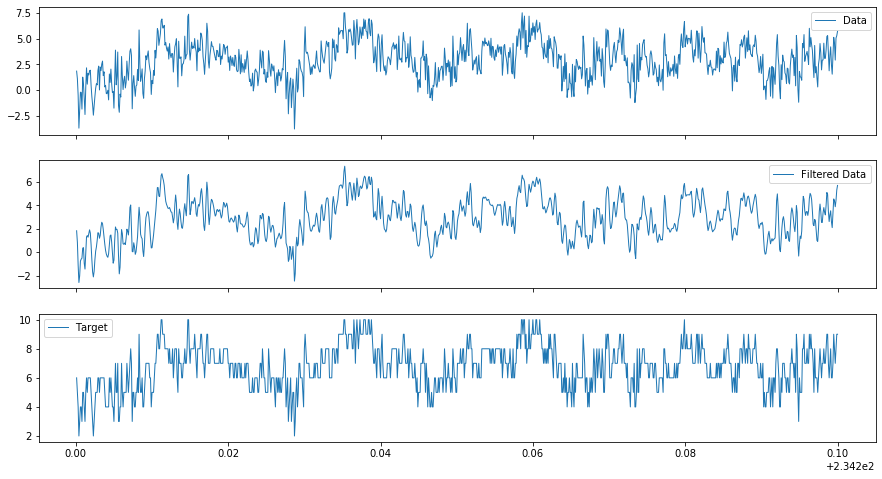

In [131]:
fig, ax = plt.subplots(3, 1, sharex = True, figsize=(15, 8))
ax[0].plot(train_data["time"].iloc[min_x:max_x], train_data["signal"].iloc[min_x:max_x], linewidth=lw, label="Data")
ax[1].plot(train_data["time"].iloc[min_x:max_x], y, linewidth=lw, label="Filtered Data")
ax[2].plot(train_data["time"].iloc[min_x:max_x], train_data["open_channels"].iloc[min_x:max_x], linewidth=lw, label="Target")
for i in [0, 1, 2]:
    ax[i].legend()

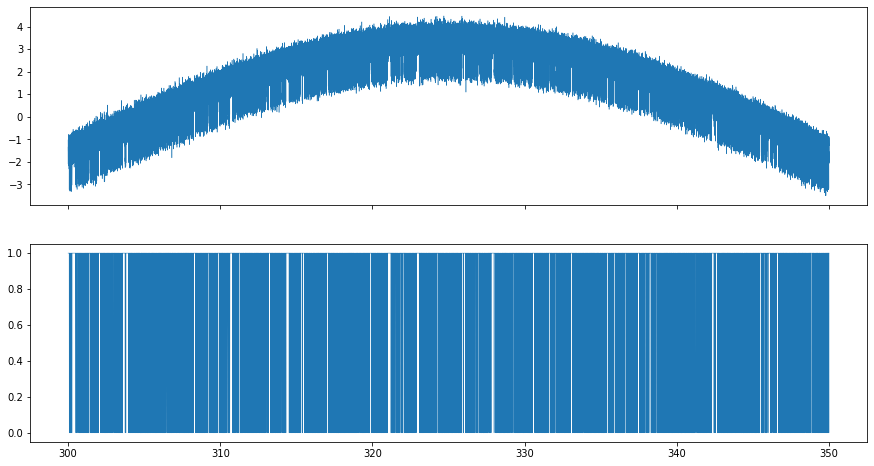

In [117]:
show_data(min_index=300*10000, max_index=350*10000, lw=0.5)

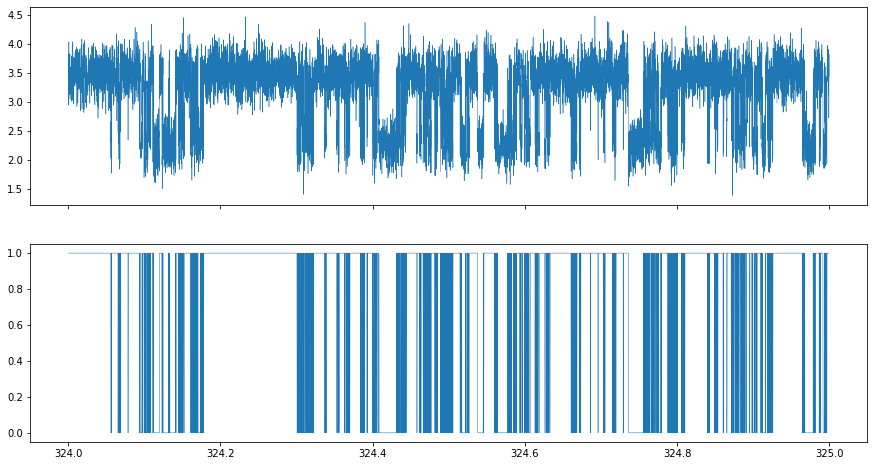

In [123]:
show_data(min_index=324*10000, max_index=325*10000, lw=0.5)

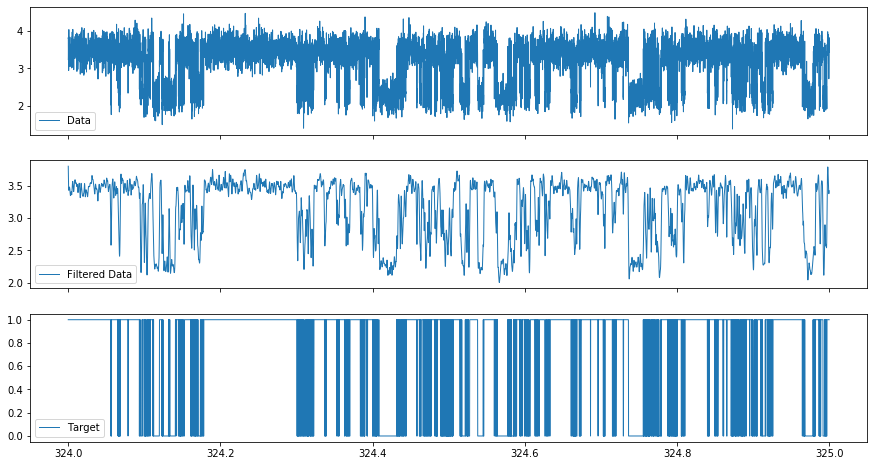

In [135]:
min_x = int(324*10000)
max_x = int(325*10000)
fig, ax = plt.subplots(3, 1, sharex = True, figsize=(15, 8))
ax[0].plot(train_data["time"].iloc[min_x:max_x], train_data["signal"].iloc[min_x:max_x], linewidth=lw, label="Data")
ax[1].plot(train_data["time"].iloc[min_x:max_x], filter_data(train_data["signal"].iloc[min_x:max_x], 500), linewidth=lw, label="Filtered Data")
ax[2].plot(train_data["time"].iloc[min_x:max_x], train_data["open_channels"].iloc[min_x:max_x], linewidth=lw, label="Target")
for i in [0, 1, 2]:
    ax[i].legend()

In [142]:
channel_values = np.sort(train_data['open_channels'].unique())
val_dict = {}
for val in channel_values:
    val_dict[val] = train_data[train_data['open_channels'] == val].loc[:, 'signal']    

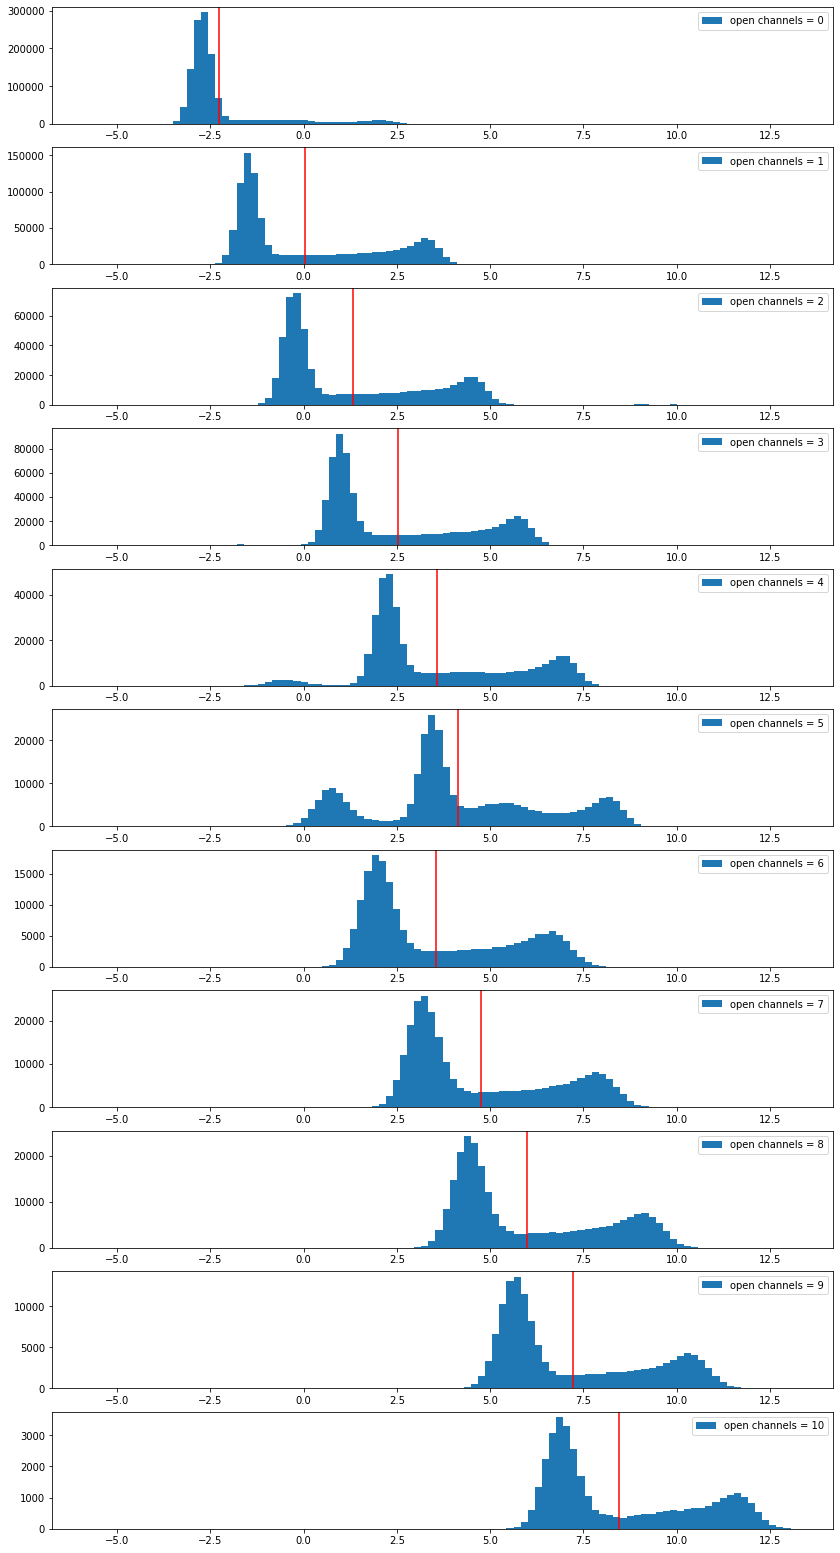

In [160]:
nb_vals = len(channel_values)
min_val = train_data['signal'].min()
max_val = train_data['signal'].max()

fig, ax = plt.subplots(nb_vals, 1, figsize=(14, 28))
for i, val in enumerate(val_dict.keys()):
    ax[i].hist(val_dict[val], label = "open channels = " + str(val), bins=100, range=(min_val, max_val))
    ax[i].axvline(x=np.mean(val_dict[val]), color="red")
    ax[i].legend()

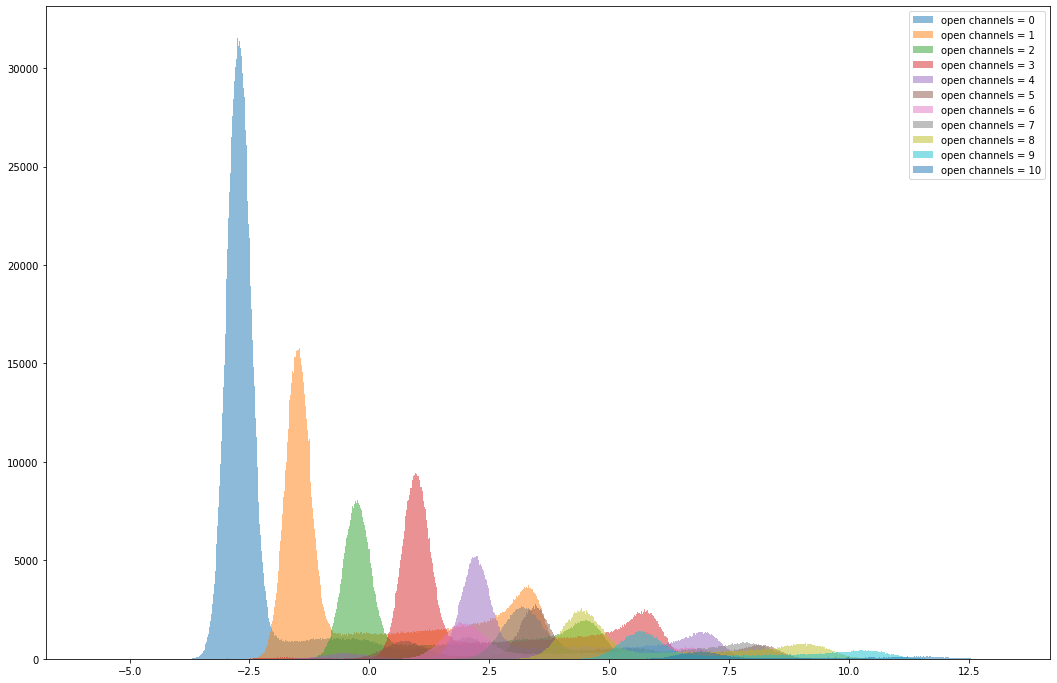

In [161]:
plt.figure(figsize=(18, 12))
for i, val in enumerate(val_dict.keys()):
    plt.hist(val_dict[val], label = "open channels = " + str(val), bins=1000, range=(min_val, max_val), alpha = 0.5)
plt.legend()

In [170]:
def plot_filtered_hists(cutoff):
    filtered_data = filter_data(train_data["signal"], cutoff)
    filtered_name = "filtered_signal_" + str(cutoff)
    train_data.loc[:, filtered_name] = filtered_data

    filtered_val_dict = {}
    for val in channel_values:
        filtered_val_dict[val] = train_data[train_data['open_channels'] == val].loc[:, filtered_name]

    plt.figure(figsize=(18, 12))
    for i, val in enumerate(val_dict.keys()):
        plt.hist(filtered_val_dict[val], label = "open channels = " + str(val), bins=1000, range=(min_val, max_val), alpha = 0.5)
    plt.ylim(0, 10000)
    plt.legend()

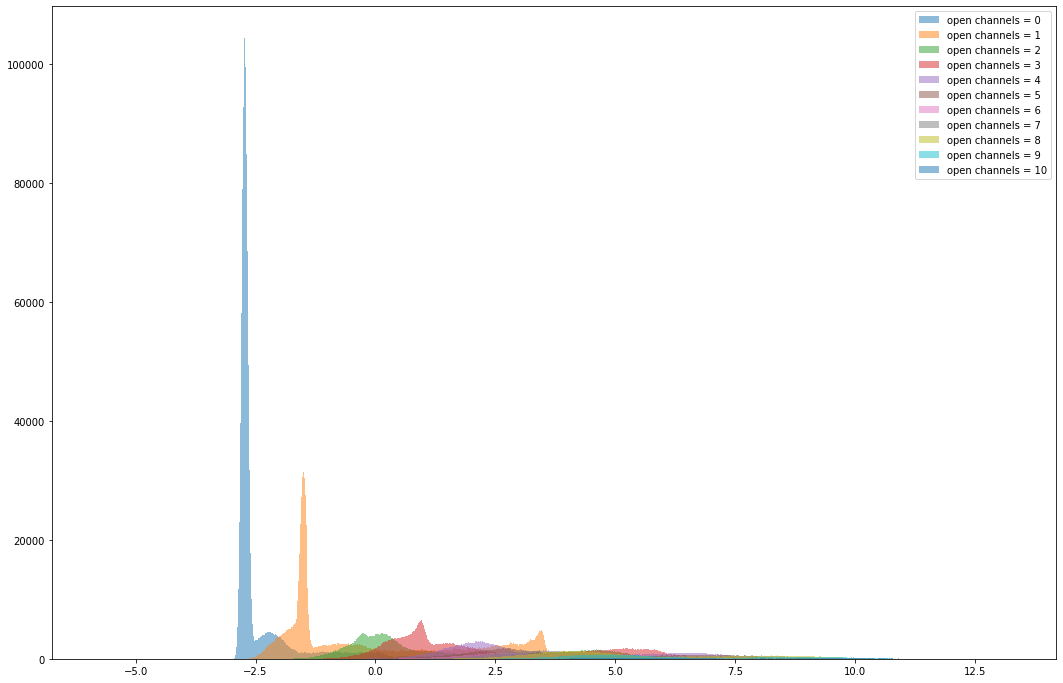

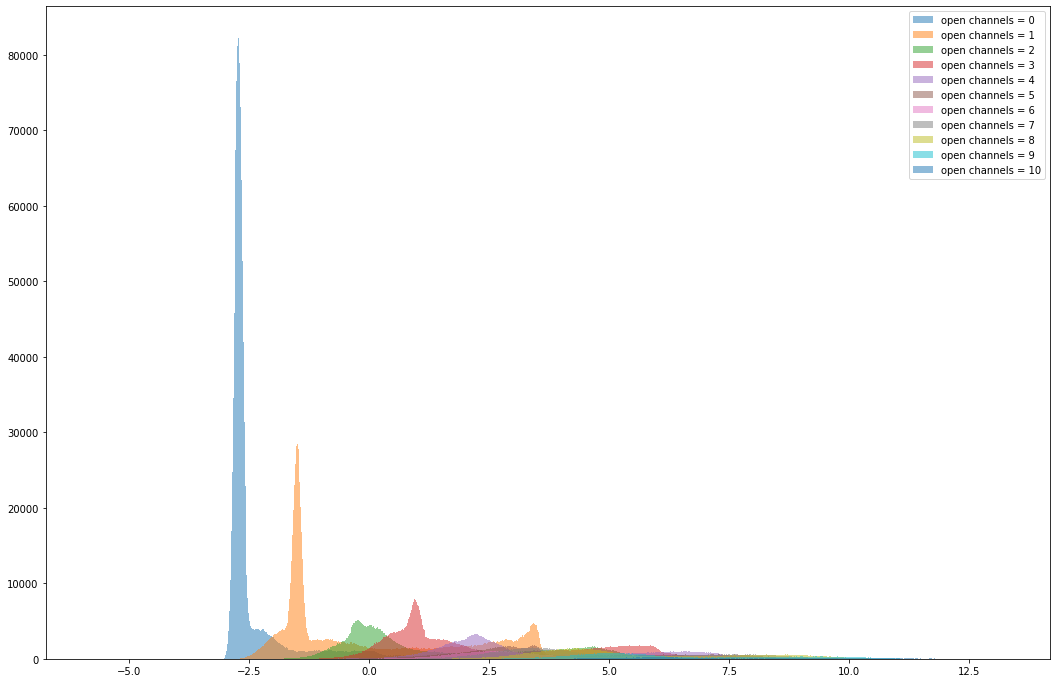

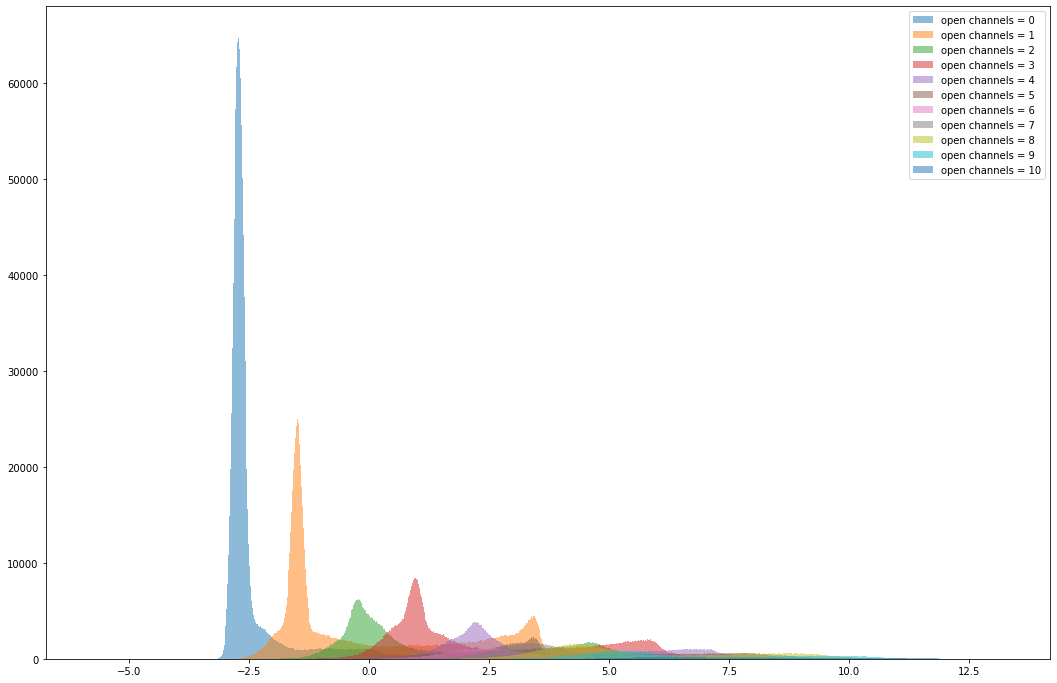

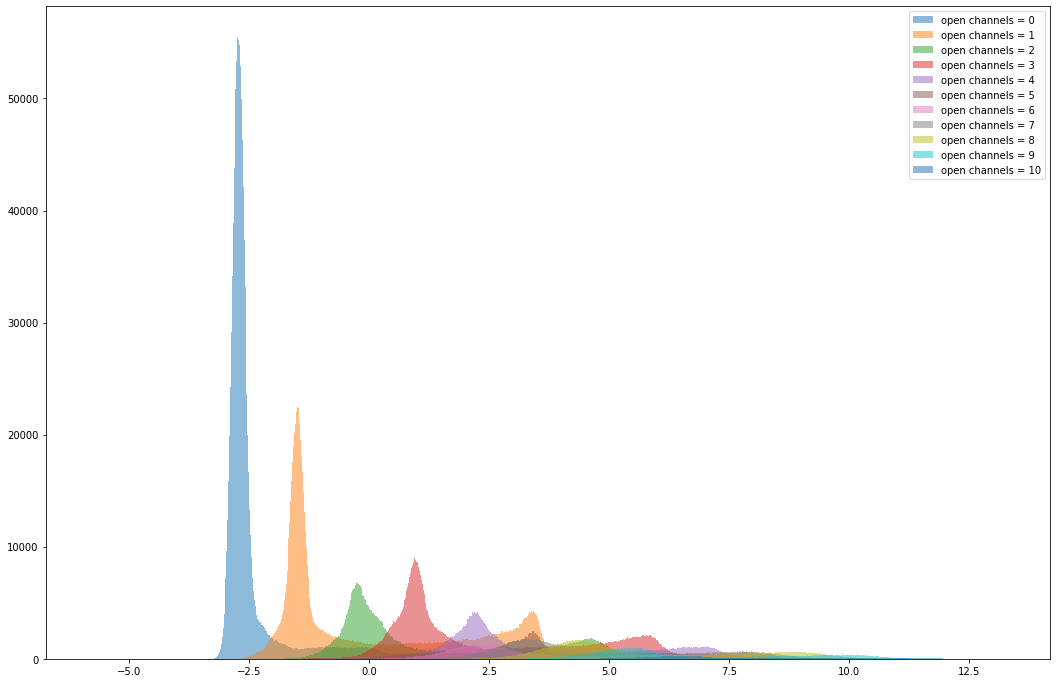

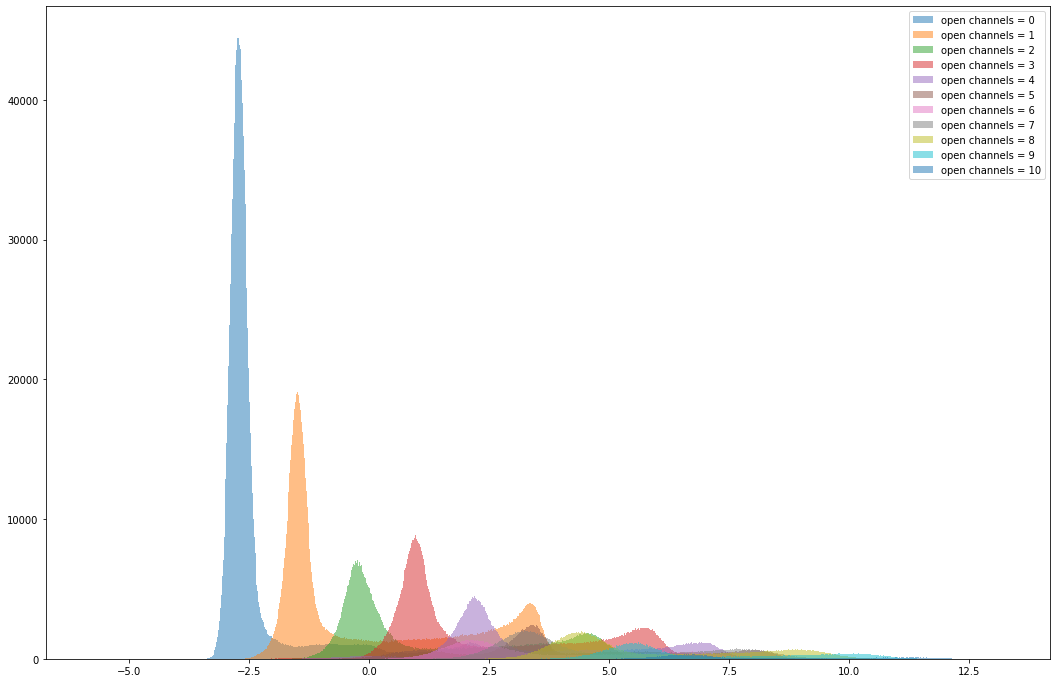

In [171]:
for cutoff in [200, 500, 1000, 1500, 2500]:
    plot_filtered_hists(cutoff)

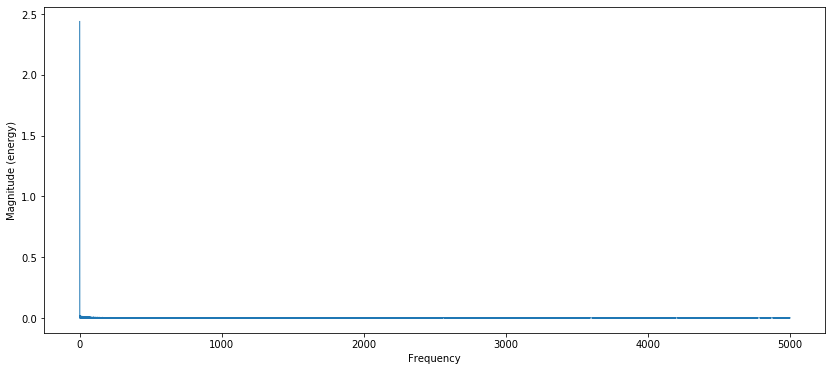

In [172]:
min_x = int(300*10000)
max_x = int(350*10000)
lw = 1
plt.figure(figsize=(14, 6))
plt.magnitude_spectrum(train_data["signal"].iloc[min_x:max_x], Fs=10000, linewidth=lw)
plt.show()

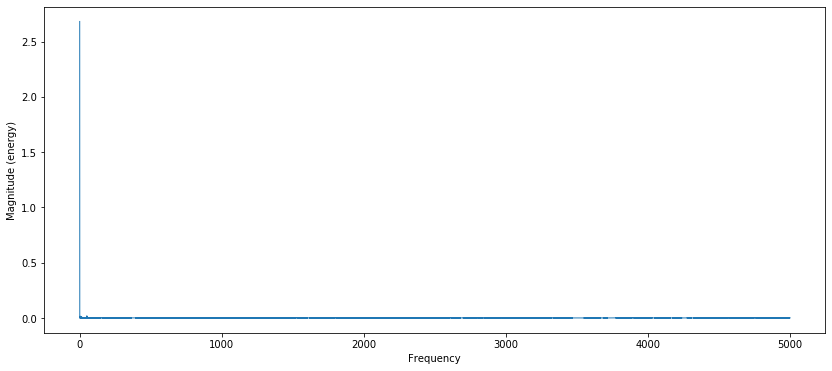

In [173]:
min_x = int(0*10000)
max_x = int(50*10000)
lw = 1
plt.figure(figsize=(14, 6))
plt.magnitude_spectrum(train_data["signal"].iloc[min_x:max_x], Fs=10000, linewidth=lw)
plt.show()

# Removing Drift

It looks like the sample period is 100 sec (with a sampling rate of 10000 Hz), so we want to filter out the frequencies inferior to 1/100 to remove this. 

In [244]:
def filter_data(data, btype='hight', cutoff=1/100):
    T = data.shape[0] / 10000
    fs = 10000
    order = 2
    nyq = 0.5 * fs
    def butter_highpass_filter(data, cutoff, fs, order):
        normal_cutoff = cutoff / nyq
        # Get the filter coefficients 
        b, a = butter(order, normal_cutoff, btype=btype, analog=False)
        y = filtfilt(b, a, data)
        return y
    return butter_highpass_filter(data, cutoff, fs, order)

In [223]:
min_idx = 50*10000
max_idx = 60*10000
first_drift_part = train_data['signal'].iloc[min_idx:max_idx]
no_drift_signal = filter_data(first_drift_part, cutoff=1)

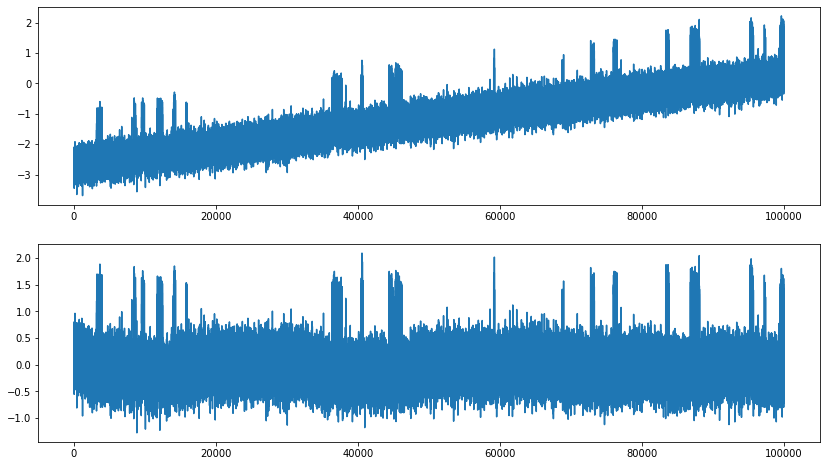

In [224]:
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
ax[0].plot(range(len(first_drift_part)), first_drift_part)
ax[1].plot(range(len(no_drift_signal)), no_drift_signal)

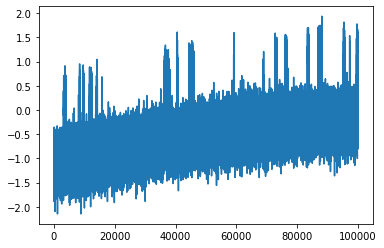

In [217]:
plt.plot(no_drift_signal)

Didn't work. Let's plot the rolling mean of the data.

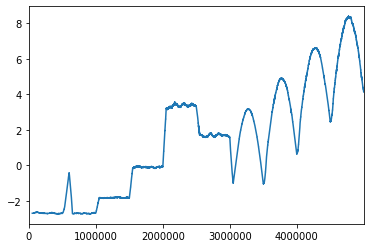

In [214]:
rolling_mean_50000 = train_data['signal'].rolling(50000).mean()
rolling_mean_1000 = train_data['signal'].rolling(1000).mean()
rolling_mean_50000.plot()

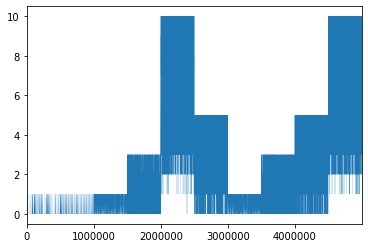

In [187]:
train_data['open_channels'].plot(linewidth=0.1)

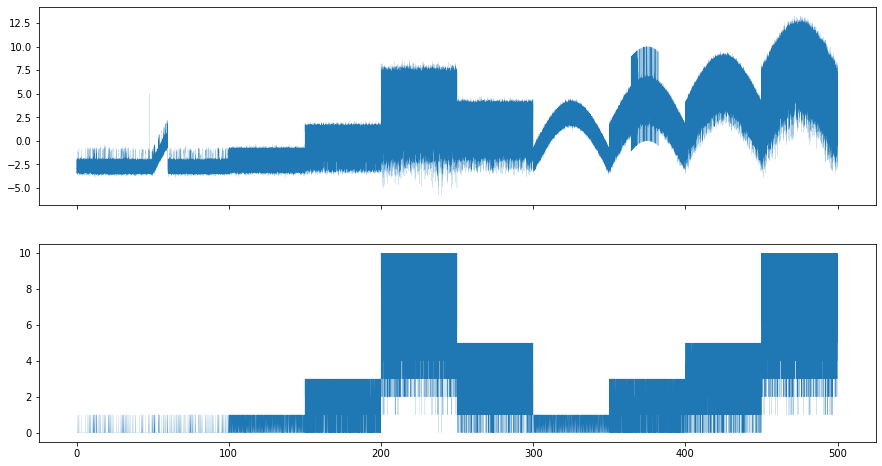

In [203]:
show_data()

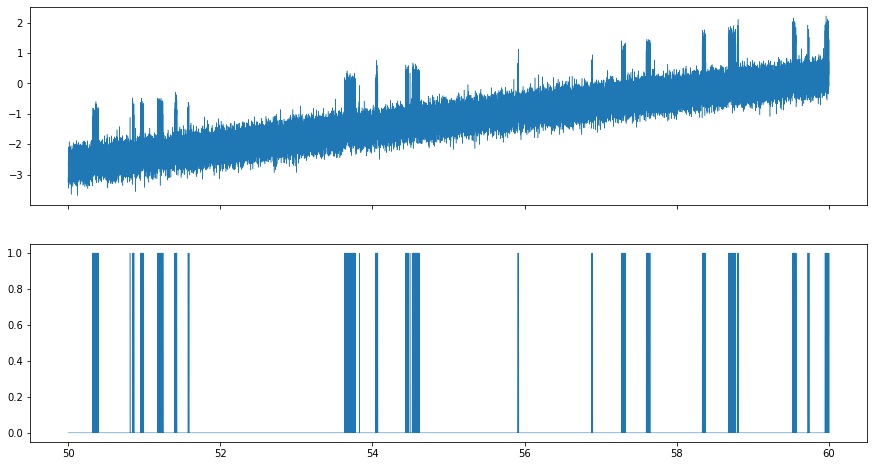

In [204]:
show_data(min_index=50*10000, max_index=60*10000, lw=0.5)

In [205]:
min_idx = 50*10000
max_idx = 60*10000
previous_values = train_data_nodrift['signal'].iloc[min_idx:max_idx].copy(deep=True)
train_data_nodrift['signal'].iloc[min_idx:max_idx] =  previous_values - rolling_mean[min_idx:max_idx]

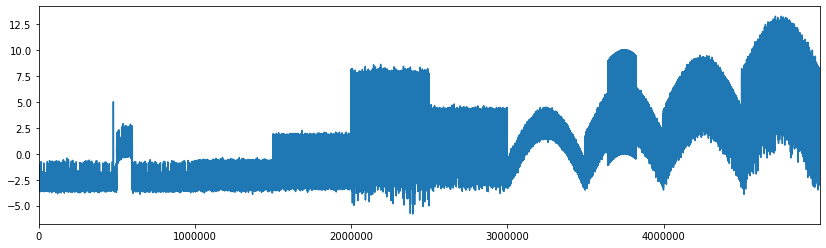

In [206]:
train_data_nodrift['signal'].plot(figsize=(14, 4))

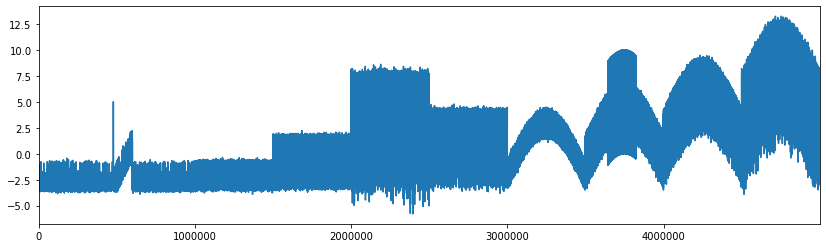

In [207]:
train_data['signal'].plot(figsize=(14, 4))

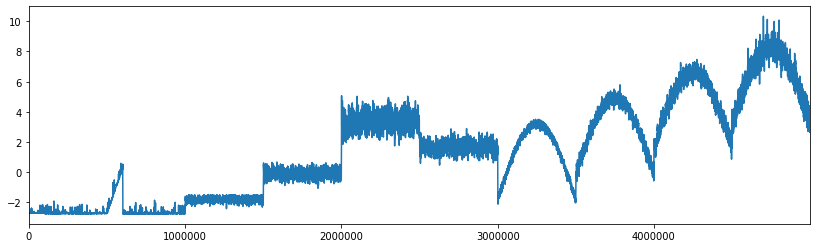

In [215]:
rolling_mean_1000.plot(figsize=(14, 4))

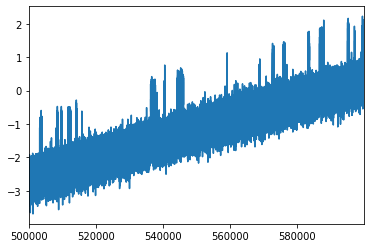

In [209]:
previous_values.plot()

Trying to substract the rolling mean from the signal doesn't work because when the rolling mean is computed, the amplitude of the signal is reduced. Back to high pass filters but this time applied separately to each of the following segments :
* From 50 to 60 sec
* From 300 to 350 sec
* From 350 to 400 sec
* From 400 to 450 sec
* From 450 to 500 sec

In [288]:
def remove_drift(data, min_index, max_index):
    partial_data = data.loc[min_index:max_index, 'signal']
    base_val = partial_data.iloc[0:1000].mean()
    highpass_data = filter_data(partial_data, btype='high', cutoff=1) + base_val
    diff = partial_data - highpass_data
    lowpass_diff = filter_data(diff, btype='low', cutoff=0.2)
    return partial_data - lowpass_diff

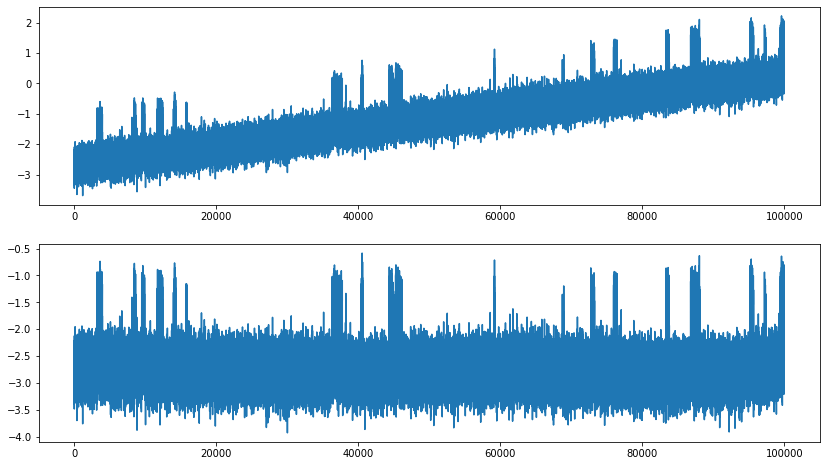

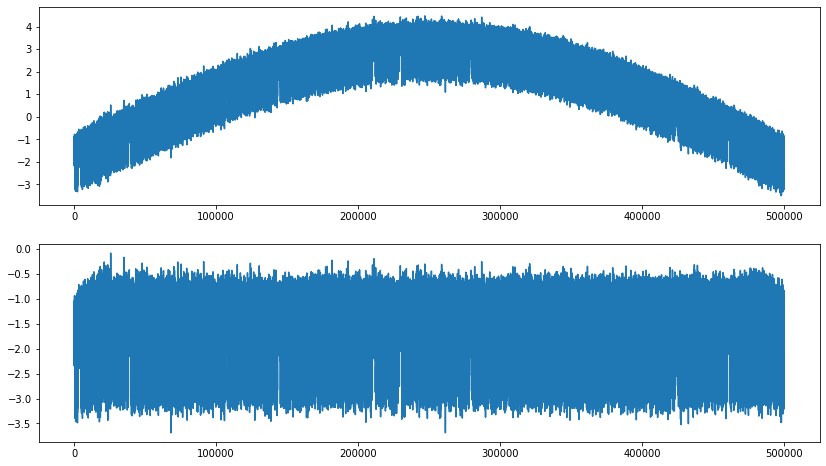

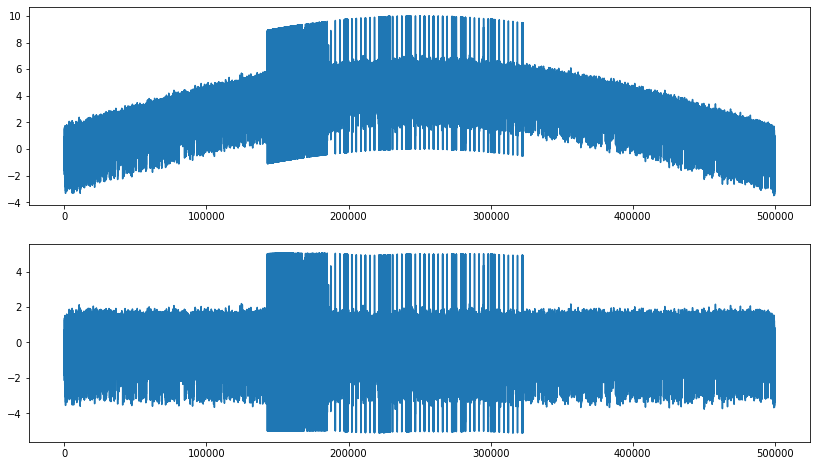

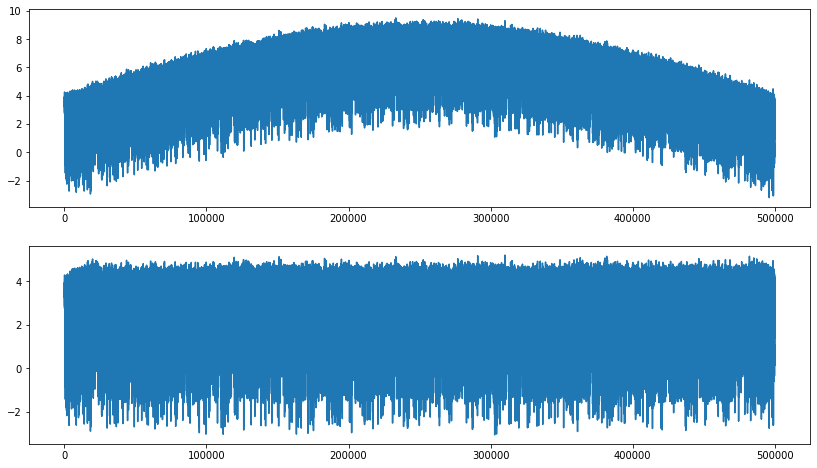

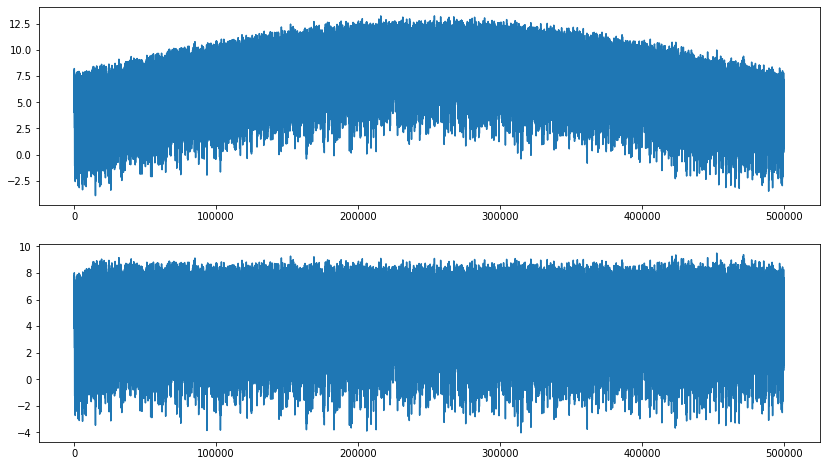

In [289]:
train_data_nodrift = train_data[['time', 'signal', 'open_channels']].copy(deep=True)

segment_list = []
segment_list.append((50, 60))
segment_list.append((300, 350))
segment_list.append((350, 400))
segment_list.append((400, 450))
segment_list.append((450, 500))

for (x, y) in segment_list:
    min_idx = int(x*10000)
    max_idx = int(y*10000)
    train_data_nodrift['signal'].iloc[min_idx:max_idx] = remove_drift(train_data, min_idx, max_idx)
    fig, ax = plt.subplots(2, 1, figsize=(14, 8))
    ax[0].plot(range(max_idx-min_idx), train_data['signal'].iloc[min_idx:max_idx])
    ax[1].plot(range(max_idx-min_idx), train_data_nodrift['signal'].iloc[min_idx:max_idx])
#     ax[0].plot(range(max_idx-min_idx), diff)
#     ax[1].plot(range(max_idx-min_idx), diff_lowpass)

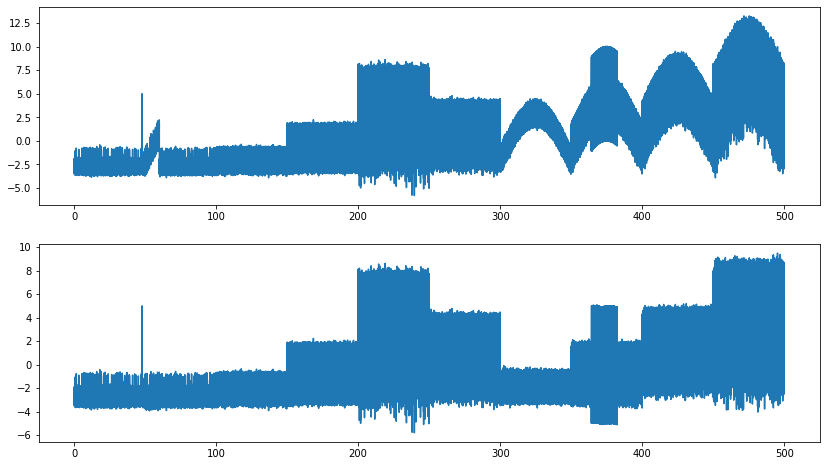

In [290]:
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
ax[0].plot(train_data['time'], train_data['signal'])
ax[1].plot(train_data_nodrift['time'], train_data_nodrift['signal'])

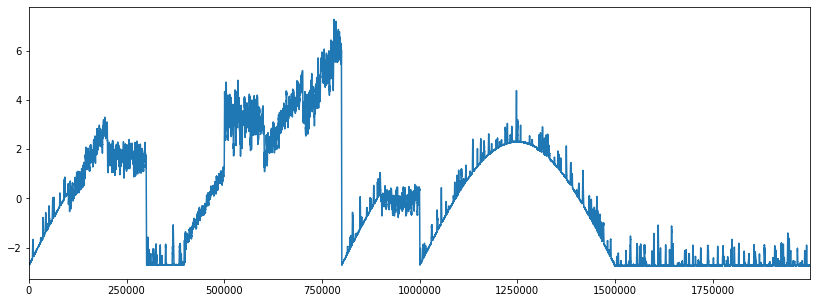

In [293]:
test_data['signal'].rolling(1000).mean().plot(figsize=(14, 5))

In [315]:
def cleanse_data(df):
    l = len(df)
    cleansed_data = df.copy(deep=True)
    
    indexes = []
    
    step_secs = 50
    
    i = 0
    while i < l:
        indexes.append((i, i+step_secs*10000))
        i += step_secs*10000
        
#     i = 0
#     while i < l:
#         indexes.append((i, i+10*10000))
#         i += 10*10000
        
    print(indexes)
    
    for (x_min, x_max) in indexes:
        new_data = remove_drift(cleansed_data, x_min, x_max)
        cleansed_data['signal'].iloc[x_min:x_max] = new_data
        
    return cleansed_data

[(0, 500000), (500000, 1000000), (1000000, 1500000), (1500000, 2000000), (2000000, 2500000), (2500000, 3000000), (3000000, 3500000), (3500000, 4000000), (4000000, 4500000), (4500000, 5000000)]


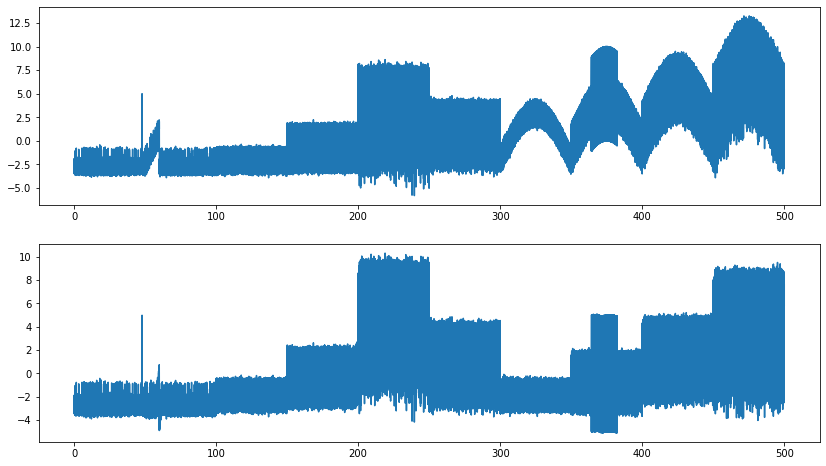

In [327]:
cleansed_train_data = cleanse_data(train_data)
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
ax[0].plot(train_data['time'], train_data['signal'])
ax[1].plot(cleansed_train_data['time'], cleansed_train_data['signal'])

[(0, 500000), (500000, 1000000), (1000000, 1500000), (1500000, 2000000)]


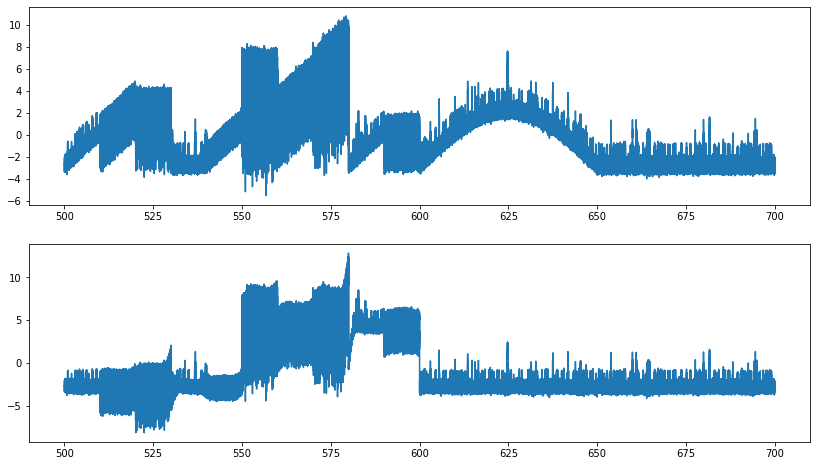

In [328]:
cleansed_test_data = cleanse_data(test_data)
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
ax[0].plot(test_data['time'], test_data['signal'])
ax[1].plot(cleansed_test_data['time'], cleansed_test_data['signal'])

In [330]:
cleansed_train_data.to_csv(os.path.join(data_folder, 'cleansed_train_data.csv'), index=False)
cleansed_test_data.to_csv(os.path.join(data_folder, 'cleansed_test_data.csv'), index=False)